In [1]:
import os
import gdown
from pathlib import Path
import zipfile
from deepface.commons import functions
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D, Flatten, Dense, Dropout

import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np
import cv2
from facecrop_image import facecrop
# from face_crop import getCroppedImages

In [2]:
directory = 'D:/EmotionRecognition/images/test3/'
res_dir = 'D:/EmotionRecognition/images/cropped/'

In [11]:
def emotion_analysis(emotions):
    objects = ('angry', 'disgust', 'fear', 'happy', 'sad', 'surprise', 'neutral')
    y_pos = np.arange(len(objects))
    
    plt.bar(y_pos, emotions, align='center', alpha=0.5)
    plt.xticks(y_pos, objects)
    plt.ylabel('percentage')
    plt.title('emotion')
    
    plt.show()

In [8]:
model = tf.keras.models.load_model('model_deep_face.h5')
model.load_weights('deep_face_weights.h5')

# model = tf.keras.models.load_model('D:ferNet.h5')
# model.load_weights('D:fernet_bestweight.h5')

(960, 718, 3)


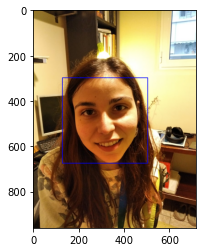

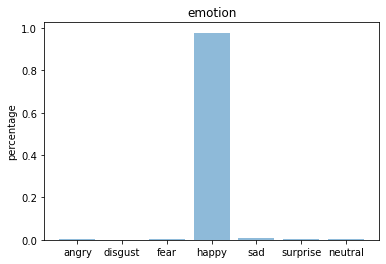

(1920, 960, 3)


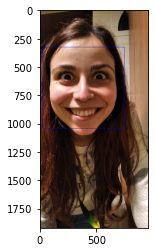

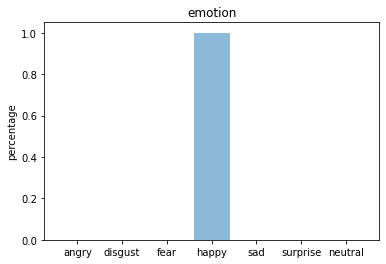

(720, 546, 3)


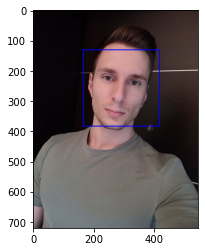

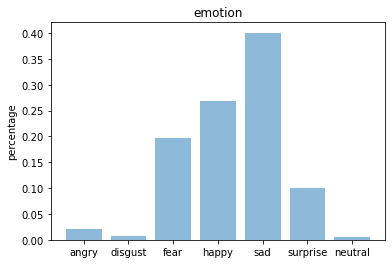

(1200, 1200, 3)


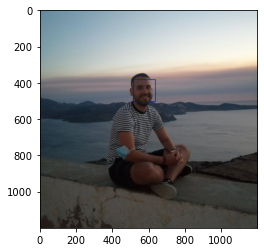

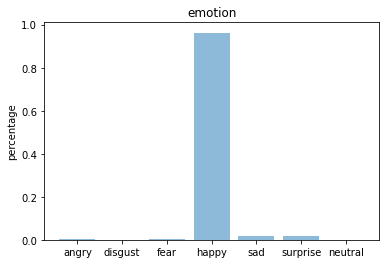

(704, 704, 3)


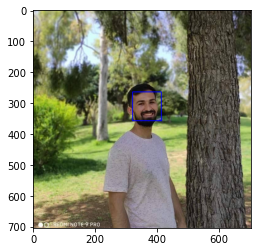

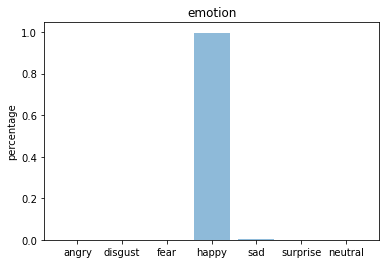

In [13]:
# path = "D:EmotionRecognition/CNN/test/surprise/PublicTest_3206770.jpg"
# path = "D:EmotionRecognition/images/testv.png"

i=1
# Take the directory of the images 
cr_images = os.listdir(directory)

for cr_img in cr_images:
    # Take the image 
    path = directory + cr_img
    
    # Crop only the face
    # Show it in the subplot
    # Save it in the result path
    cropped = facecrop(path,cr_img)
    plt.show()
    
    res_path = res_dir + 'Cropped ' +cr_img
    
    true_img = image.load_img(res_path)
    
    img = image.load_img(res_path, target_size=(48, 48),color_mode = "grayscale")

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis = 0)
    x /= 255
    custom =model.predict(x)
    emotion_analysis(custom[0])
    x = np.array(x, 'float32')
    x = x.reshape([48, 48]);

    i += 1

#     plt.show()